<a href="https://colab.research.google.com/github/asmaislampromi/DeepLearningAssignment2/blob/main/DeepLearningAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Check the shape of the dataset
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


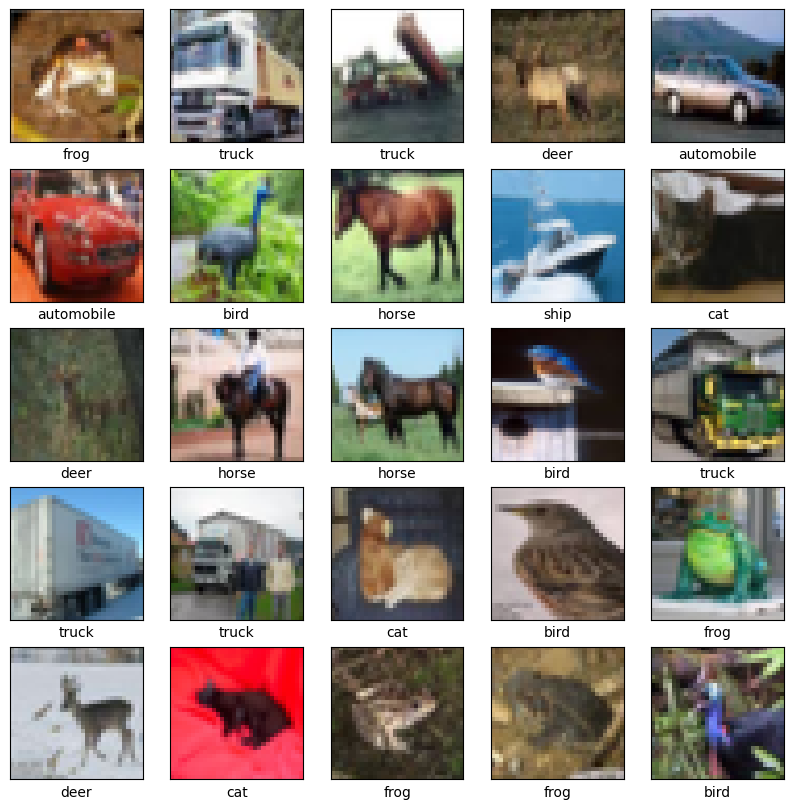

In [ ]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from sklearn.model_selection import train_test_split

# Split data to create a validation set
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42)


In [ ]:
# Define a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Show model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 48ms/step - accuracy: 0.3370 - loss: 1.7812 - val_accuracy: 0.5100 - val_loss: 1.3478
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.5620 - loss: 1.2406 - val_accuracy: 0.6090 - val_loss: 1.1015
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6284 - loss: 1.0601 - val_accuracy: 0.6358 - val_loss: 1.0414
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.6642 - loss: 0.9618 - val_accuracy: 0.6700 - val_loss: 0.9327
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6998 - loss: 0.8573 - val_accuracy: 0.6706 - val_loss: 0.9306
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7236 - loss: 0.7915 - val_accuracy: 0.6772 - val_loss: 0.9303
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.7376 - loss: 0.7403 - val_accuracy: 0.6882 - val_loss: 0.8895
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 112s 67ms/step - accuracy: 0.7562 

In [ ]:
# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Overall Test Accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7070 - loss: 0.8799
Overall Test Accuracy: 70.49%


In [ ]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
test_labels_flat = test_labels.flatten()

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Classification Report:\n", classification_report(test_labels_flat, y_pred_classes, target_names=class_names))




313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.74      0.76      0.75      1000
  automobile       0.79      0.86      0.83      1000
        bird       0.61      0.62      0.62      1000
         cat       0.58      0.40      0.48      1000
        deer       0.60      0.71      0.65      1000
         dog       0.57      0.66      0.61      1000
        frog       0.84      0.70      0.77      1000
       horse       0.66      0.81      0.73      1000
        ship       0.85      0.79      0.82      1000
       truck       0.87      0.71      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



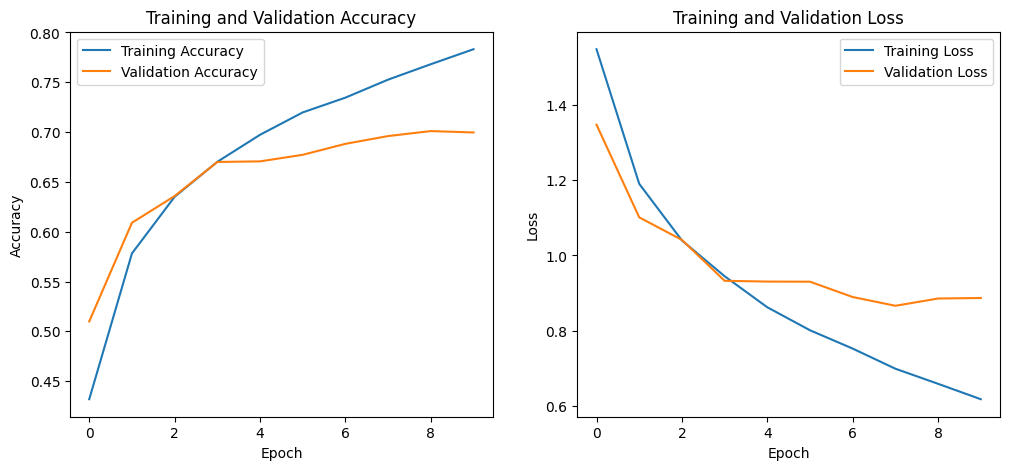

In [ ]:
# Plot training and validation data accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [ ]:
# Binarize test labels
test_labels_binarized = label_binarize(test_labels.flatten(), classes=range(10))


In [ ]:
#apply softmax to convert logits to probabilities
y_pred_proba = tf.nn.softmax(model.predict(test_images)).numpy()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


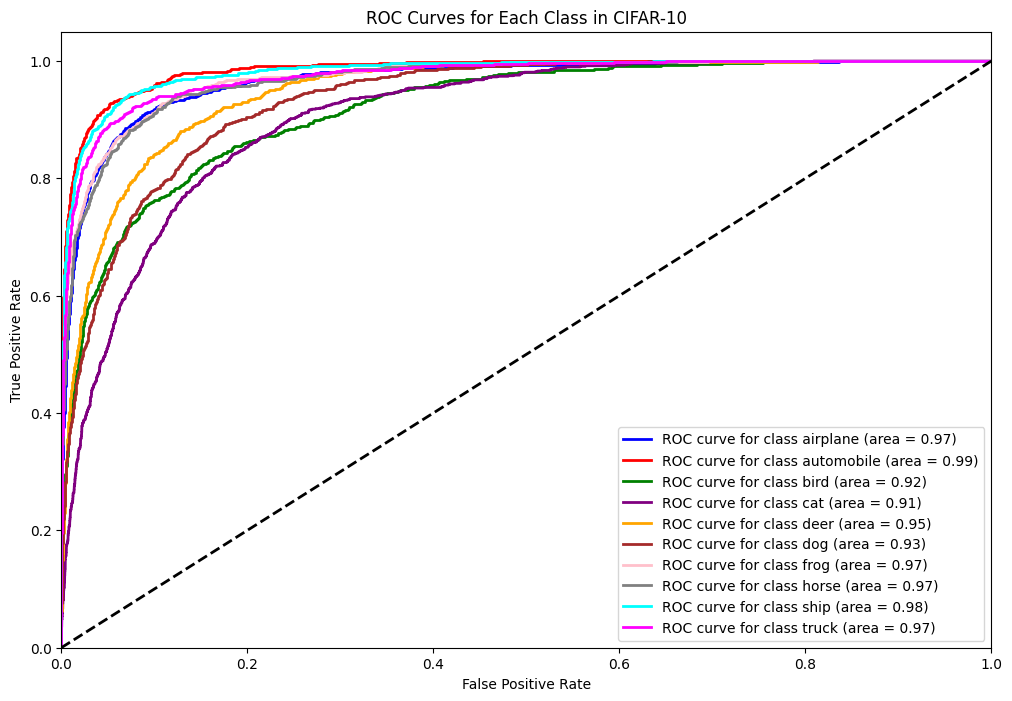

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class in CIFAR-10')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
def build_model(optimizer='adam', learning_rate=0.001, regularization=None, use_residual=False):
    inputs = layers.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularization)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    if use_residual:
        residual = x
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularization)(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if use_residual:
        x = layers.add([x, residual])


    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularization)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10)(x)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Set optimizer
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model
# Show model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [ ]:
# Define hyperparameters
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01]
regularizations = [None]
residuals = [False]

# Set K-Fold and epochs
k = 3
epochs = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store results
results = {}

for optimizer in optimizers:
    for lr in learning_rates:
        for reg in regularizations:
            for res in residuals:
                print(f"\nConfig: optimizer={optimizer}, lr={lr}, regularization={reg}, residual={res}")

                fold_val_accuracies = []
                fold_train_accuracies = []

                for train_index, val_index in kf.split(train_images):
                    X_train, X_val = train_images[train_index], train_images[val_index]
                    y_train, y_val = train_labels[train_index], train_labels[val_index]


                    model = build_model(optimizer=optimizer, learning_rate=lr,
                                        regularization=reg, use_residual=res)
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64,
                                        validation_data=(X_val, y_val), verbose=0)

                    val_acc = history.history['val_accuracy'][-1]
                    train_acc = history.history['accuracy'][-1]
                    fold_val_accuracies.append(val_acc)
                    fold_train_accuracies.append(train_acc)

                avg_val_acc = np.mean(fold_val_accuracies)
                avg_train_acc = np.mean(fold_train_accuracies)
                config_name = f"opt={optimizer}_lr={lr}_reg={reg}_res={res}"
                results[config_name] = {'train_acc': avg_train_acc, 'val_acc': avg_val_acc}

                print(f"Avg Train Acc: {avg_train_acc:.4f}, Avg Val Acc: {avg_val_acc:.4f}")



Config: optimizer=adam, lr=0.001, regularization=None, residual=False
Avg Train Acc: 0.5313, Avg Val Acc: 0.5730

Config: optimizer=adam, lr=0.01, regularization=None, residual=False
Avg Train Acc: 0.2839, Avg Val Acc: 0.2878

Config: optimizer=sgd, lr=0.001, regularization=None, residual=False
Avg Train Acc: 0.1629, Avg Val Acc: 0.1759

Config: optimizer=sgd, lr=0.01, regularization=None, residual=False
Avg Train Acc: 0.3332, Avg Val Acc: 0.3634


In [ ]:
# best configuration based on validation accuracy
best_config = max(results, key=lambda x: results[x]['val_acc'])
print("\nBest Configuration:", best_config)
print("Validation Accuracy:", results[best_config]['val_acc'])



Best Configuration: opt=adam_lr=0.001_reg=None_res=False
Validation Accuracy: 0.5729777812957764


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


best_params = best_config.split("_")
best_optimizer = best_params[0].split("=")[1]
best_lr = float(best_params[1].split("=")[1])
best_reg = None if best_params[2].split("=")[1] == 'None' else regularizers.l2(0.001)
best_res = best_params[3].split("=")[1] == 'True'

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)

# Build and train the final model
final_model = build_model(optimizer=best_optimizer, learning_rate=best_lr,
                          regularization=best_reg, use_residual=best_res)

#final training with epochs and early stopping
history = final_model.fit(train_images, train_labels, epochs=5, batch_size=128,  # Reduced epochs, increased batch size
                          validation_data=(val_images, val_labels), verbose=1,
                          callbacks=[early_stopping])


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 120s 335ms/step - accuracy: 0.2776 - loss: 1.9664 - val_accuracy: 0.4704 - val_loss: 1.4829
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 156s 375ms/step - accuracy: 0.4756 - loss: 1.4712 - val_accuracy: 0.5356 - val_loss: 1.2928
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 121s 315ms/step - accuracy: 0.5327 - loss: 1.3091 - val_accuracy: 0.5500 - val_loss: 1.2789
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 160s 366ms/step - accuracy: 0.5706 - loss: 1.2139 - val_accuracy: 0.5866 - val_loss: 1.1754
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 158s 413ms/step - accuracy: 0.5995 - loss: 1.1422 - val_accuracy: 0.5940 - val_loss: 1.1483
Restoring model weights from the end of the best epoch: 5.


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6238 - loss: 1.1012
Test Accuracy with Best Hyperparameters: 61.91%


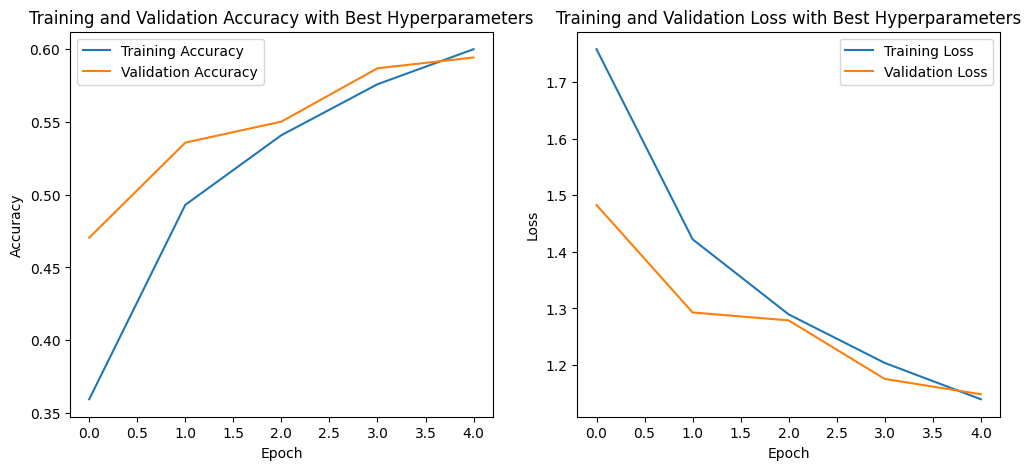

In [ ]:
# Evaluate the final model
test_loss, test_accuracy = final_model.evaluate(test_images, test_labels)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Best Hyperparameters')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Best Hyperparameters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:

y_pred_proba = tf.nn.softmax(final_model.predict(test_images)).numpy()
y_pred_classes = np.argmax(y_pred_proba, axis=1)
test_labels_flat = test_labels.flatten()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Final Model Classification Report:\n", classification_report(test_labels_flat, y_pred_classes, target_names=class_names))


Final Model Classification Report:
               precision    recall  f1-score   support

    airplane       0.67      0.69      0.68      1000
  automobile       0.62      0.87      0.72      1000
        bird       0.70      0.32      0.44      1000
         cat       0.59      0.29      0.39      1000
        deer       0.62      0.44      0.51      1000
         dog       0.58      0.55      0.56      1000
        frog       0.56      0.83      0.67      1000
       horse       0.54      0.81      0.65      1000
        ship       0.79      0.69      0.73      1000
       truck       0.64      0.71      0.67      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.60     10000
weighted avg       0.63      0.62      0.60     10000



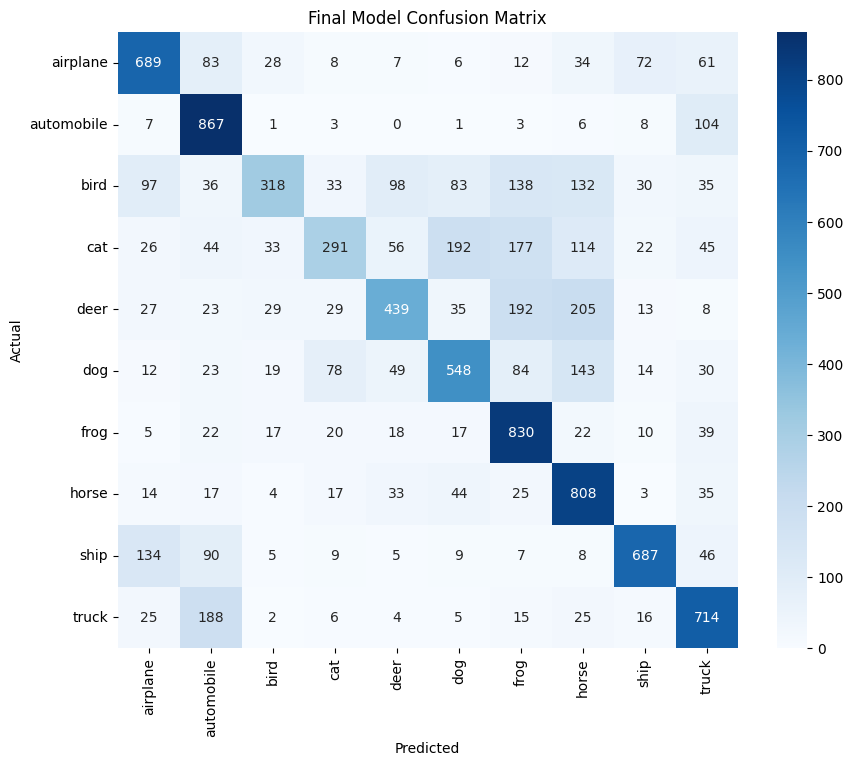

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#confusion matrix
cm = confusion_matrix(test_labels_flat, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Model Confusion Matrix')
plt.show()


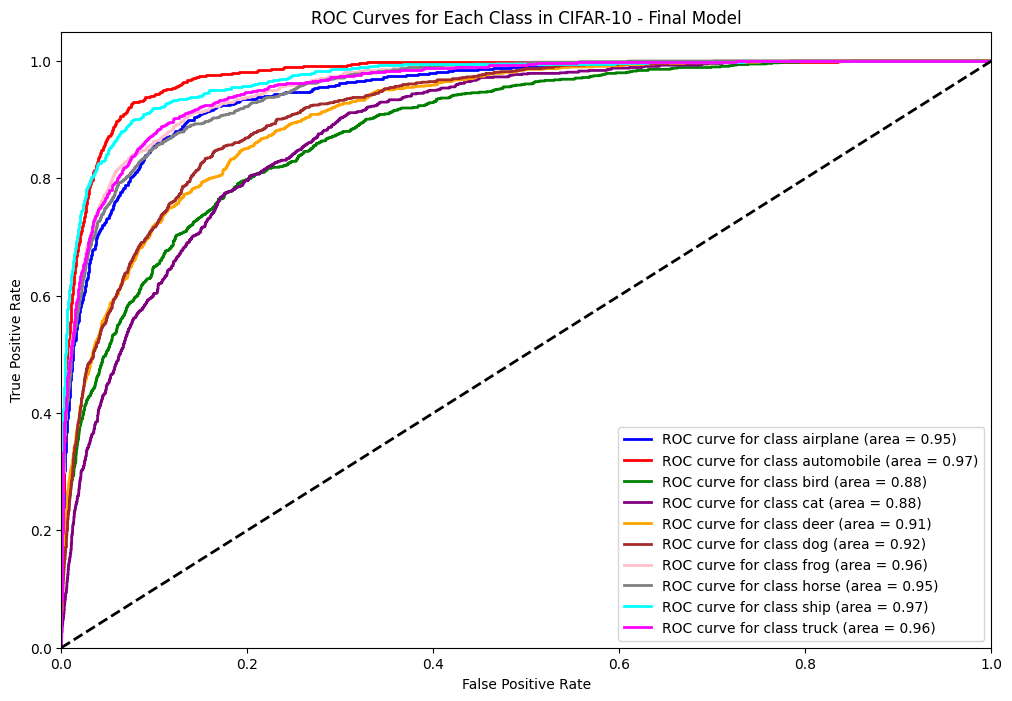

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


test_labels_binarized = label_binarize(test_labels_flat, classes=range(10))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class in CIFAR-10 - Final Model')
plt.legend(loc="lower right")
plt.show()


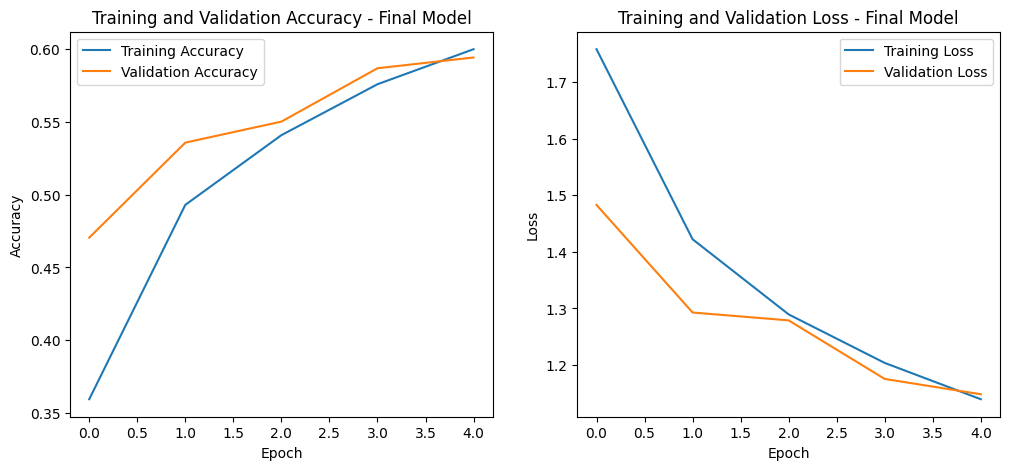

In [ ]:
# Plot training and validation accuracy and loss for final model
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Final Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Final Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_simplified_alexnet():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10)
    ])
    return model

alexnet_model = build_simplified_alexnet()

# Show model summary
alexnet_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 2, 2, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,042 (1.18 MB)

 Trainable params: 308,042 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
alexnet_model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])


In [ ]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Train the model
history_alexnet = alexnet_model.fit(train_images, train_labels, epochs=5, batch_size=64,
                                    validation_split=0.05, verbose=1)  # Reduced validation split for speed


Epoch 1/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 87s 115ms/step - accuracy: 0.2170 - loss: 2.0256 - val_accuracy: 0.4728 - val_loss: 1.4450
Epoch 2/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 141s 114ms/step - accuracy: 0.4710 - loss: 1.4498 - val_accuracy: 0.5684 - val_loss: 1.1974
Epoch 3/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 88s 118ms/step - accuracy: 0.5609 - loss: 1.2330 - val_accuracy: 0.6164 - val_loss: 1.0880
Epoch 4/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 149s 127ms/step - accuracy: 0.6263 - loss: 1.0767 - val_accuracy: 0.6564 - val_loss: 0.9814
Epoch 5/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 139s 123ms/step - accuracy: 0.6576 - loss: 0.9830 - val_accuracy: 0.6804 - val_loss: 0.9147


In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = alexnet_model.evaluate(test_images, test_labels)
print(f"AlexNet Model Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6724 - loss: 0.9423
AlexNet Model Test Accuracy: 66.74%


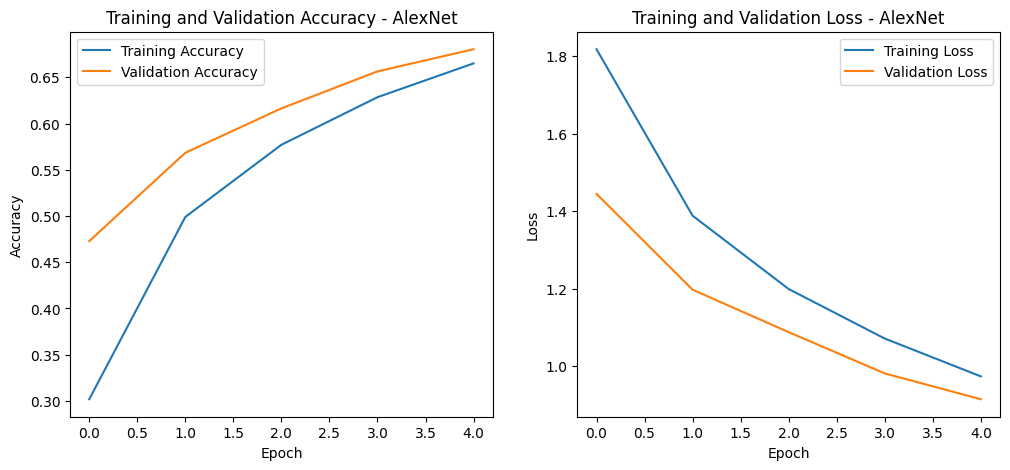

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss for AlexNet
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'], label='Training Loss')
plt.plot(history_alexnet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
 AlexNet Model Classification Report:
               precision    recall  f1-score   support

    airplane       0.71      0.68      0.70      1000
  automobile       0.80      0.83      0.81      1000
        bird       0.46      0.66      0.54      1000
         cat       0.57      0.27      0.37      1000
        deer       0.66      0.51      0.57      1000
         dog       0.56      0.62      0.59      1000
        frog       0.67      0.81      0.74      1000
       horse       0.69      0.78      0.73      1000
        ship       0.78      0.78      0.78      1000
       truck       0.83      0.74      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



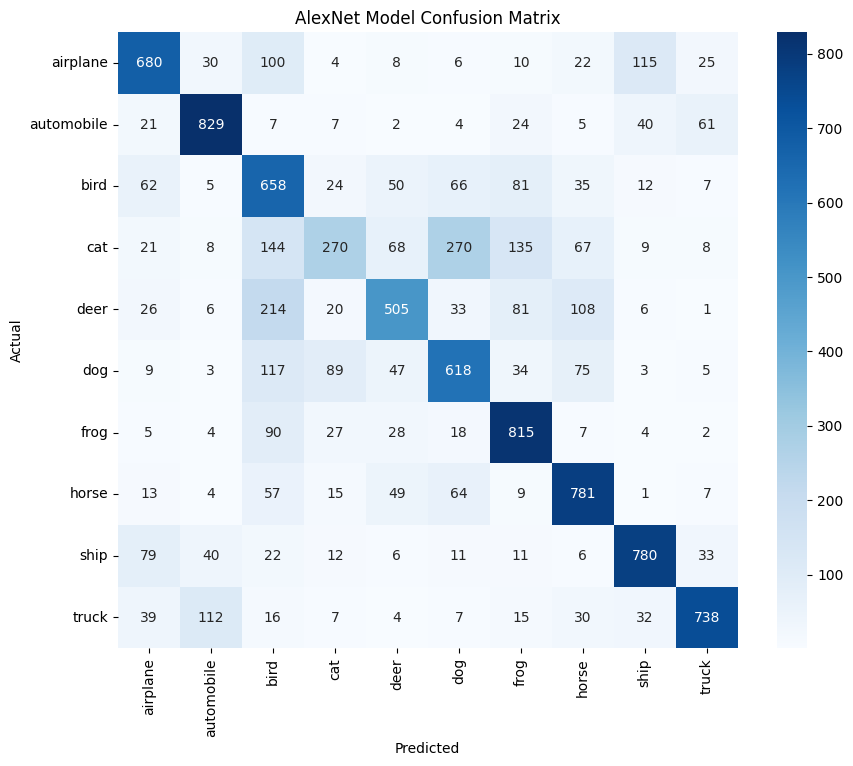

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred_proba_alexnet = tf.nn.softmax(alexnet_model.predict(test_images)).numpy()
y_pred_classes_alexnet = np.argmax(y_pred_proba_alexnet, axis=1)
test_labels_flat = test_labels.flatten()

# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(" AlexNet Model Classification Report:\n", classification_report(test_labels_flat, y_pred_classes_alexnet, target_names=class_names))

# Confusion matrix
cm_alexnet = confusion_matrix(test_labels_flat, y_pred_classes_alexnet)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_alexnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AlexNet Model Confusion Matrix')
plt.show()


In [ ]:
# Get predicted probabilities for the test set
y_pred_proba_alexnet = tf.nn.softmax(alexnet_model.predict(test_images)).numpy()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [ ]:
from sklearn.preprocessing import label_binarize


test_labels_binarized = label_binarize(test_labels.flatten(), classes=range(10))


In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred_proba_alexnet[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


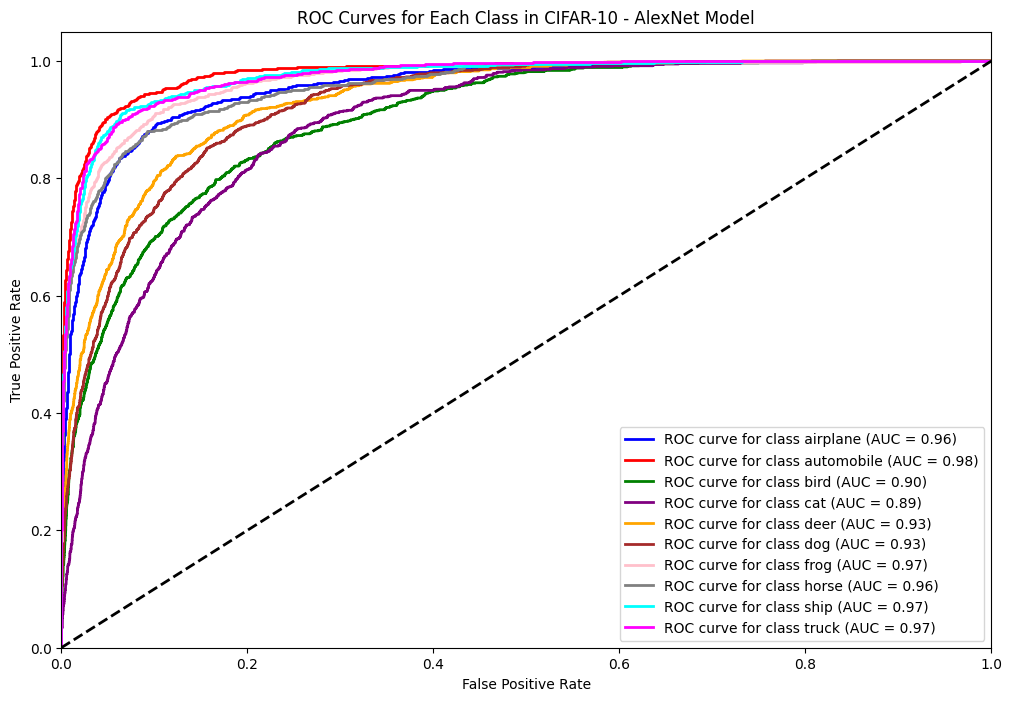

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class in CIFAR-10 - AlexNet Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import KFold


In [ ]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize images


In [ ]:
# Define AlexNet model builder function
def build_alexnet_model(optimizer='adam', learning_rate=0.001):
    # Set optimizer with learning rate
    if optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = optimizers.SGD(learning_rate=learning_rate)

    # Define simplified AlexNet model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10)  # Output layer for CIFAR-10 classes
    ])

    # Compile model
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model
model=build_alexnet_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 2, 2, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,042 (1.18 MB)

 Trainable params: 308,042 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define hyperparameter grid with a different name for optimizer list to avoid conflicts
opt_choices = ['adam', 'sgd']           # Test two optimizers
learning_rates = [0.001, 0.01]          # Test two learning rates
regularizations = [None]                # No regularization to keep it fast
residuals = [False]                     # Disable residuals for simplicity

# Set K-Fold and epochs to reduce execution time
k = 3
epochs = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [ ]:
# Store results for each configuration
results = {}

for optimizer in opt_choices:  # Using `opt_choices` instead of `optimizers`
    for lr in learning_rates:
        for reg in regularizations:
            for res in residuals:
                print(f"\nConfig: optimizer={optimizer}, lr={lr}, regularization={reg}, residual={res}")

                fold_val_accuracies = []
                fold_train_accuracies = []

                for train_index, val_index in kf.split(train_images):
                    X_train, X_val = train_images[train_index], train_images[val_index]
                    y_train, y_val = train_labels[train_index], train_labels[val_index]

                    # Build and train model with current configuration
                    model = build_alexnet_model(optimizer=optimizer, learning_rate=lr)  # Pass optimizer as a string
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64,
                                        validation_data=(X_val, y_val), verbose=0)

                    # Collect validation and training accuracy for this fold
                    val_acc = history.history['val_accuracy'][-1]
                    train_acc = history.history['accuracy'][-1]
                    fold_val_accuracies.append(val_acc)
                    fold_train_accuracies.append(train_acc)

                # Average accuracies over folds
                avg_val_acc = np.mean(fold_val_accuracies)
                avg_train_acc = np.mean(fold_train_accuracies)
                config_name = f"opt={optimizer}_lr={lr}_reg={reg}_res={res}"
                results[config_name] = {'train_acc': avg_train_acc, 'val_acc': avg_val_acc}

                print(f"Avg Train Acc: {avg_train_acc:.4f}, Avg Val Acc: {avg_val_acc:.4f}")



Config: optimizer=adam, lr=0.001, regularization=None, residual=False
Avg Train Acc: 0.5432, Avg Val Acc: 0.5752

Config: optimizer=adam, lr=0.01, regularization=None, residual=False
Avg Train Acc: 0.1008, Avg Val Acc: 0.0973

Config: optimizer=sgd, lr=0.001, regularization=None, residual=False
Avg Train Acc: 0.1104, Avg Val Acc: 0.1443

Config: optimizer=sgd, lr=0.01, regularization=None, residual=False
Avg Train Acc: 0.1805, Avg Val Acc: 0.2209


In [ ]:
# Display all configurations and their results
print("\nHyperparameter Tuning Results:")
for config, metrics in results.items():
    print(f"{config}: Train Acc={metrics['train_acc']:.4f}, Val Acc={metrics['val_acc']:.4f}")



Hyperparameter Tuning Results:
opt=adam_lr=0.001_reg=None_res=False: Train Acc=0.5432, Val Acc=0.5752
opt=adam_lr=0.01_reg=None_res=False: Train Acc=0.1008, Val Acc=0.0973
opt=sgd_lr=0.001_reg=None_res=False: Train Acc=0.1104, Val Acc=0.1443
opt=sgd_lr=0.01_reg=None_res=False: Train Acc=0.1805, Val Acc=0.2209


In [ ]:
# Find the best configuration based on validation accuracy
best_config = max(results, key=lambda config: results[config]['val_acc'])
best_params = best_config.split('_')
best_optimizer = best_params[0].split('=')[1]
best_lr = float(best_params[1].split('=')[1])

print(f"\nBest Configuration: {best_config}")
print(f"Optimizer: {best_optimizer}, Learning Rate: {best_lr}")



Best Configuration: opt=adam_lr=0.001_reg=None_res=False
Optimizer: adam, Learning Rate: 0.001


In [ ]:
# Rebuild the model with the best hyperparameters
final_model = build_alexnet_model(optimizer=best_optimizer, learning_rate=best_lr)

# Train the model on the full training set
history = final_model.fit(train_images, train_labels,
                          epochs=5,  # Reduced epochs for faster training
                          batch_size=64,
                          validation_split=0.05,  # Smaller validation split for quicker validation
                          verbose=1)


Epoch 1/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 101s 133ms/step - accuracy: 0.2359 - loss: 1.9831 - val_accuracy: 0.4932 - val_loss: 1.4400
Epoch 2/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 90s 122ms/step - accuracy: 0.5067 - loss: 1.3756 - val_accuracy: 0.5952 - val_loss: 1.1401
Epoch 3/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 167s 155ms/step - accuracy: 0.5938 - loss: 1.1717 - val_accuracy: 0.5972 - val_loss: 1.1424
Epoch 4/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 128s 137ms/step - accuracy: 0.6378 - loss: 1.0495 - val_accuracy: 0.6724 - val_loss: 0.9559
Epoch 5/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 126s 115ms/step - accuracy: 0.6748 - loss: 0.9473 - val_accuracy: 0.6716 - val_loss: 0.9519


In [ ]:
# Evaluate on the test set to obtain the final accuracy
test_loss, test_accuracy = final_model.evaluate(test_images, test_labels, verbose=0)
print(f"Final alexnet Model Test Accuracy: {test_accuracy * 100:.2f}%")


Final alexnet Model Test Accuracy: 66.50%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Get model predictions
y_pred_probs = final_model.predict(test_images)  # Predicted probabilities
y_pred = y_pred_probs.argmax(axis=1)  # Predicted classes
y_true = test_labels.flatten()  # True labels

# Binarize labels for ROC and AUC (one-hot encode)
y_true_bin = label_binarize(y_true, classes=range(10))
y_pred_probs_bin = y_pred_probs  # Already in one-hot format from softmax output


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.72      0.89      0.80      1000
           2       0.54      0.55      0.55      1000
           3       0.49      0.38      0.43      1000
           4       0.65      0.57      0.61      1000
           5       0.69      0.37      0.48      1000
           6       0.66      0.85      0.74      1000
           7       0.65      0.79      0.71      1000
           8       0.81      0.74      0.77      1000
           9       0.72      0.74      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.66      0.67      0.65     10000
weighted avg       0.66      0.67      0.65     10000



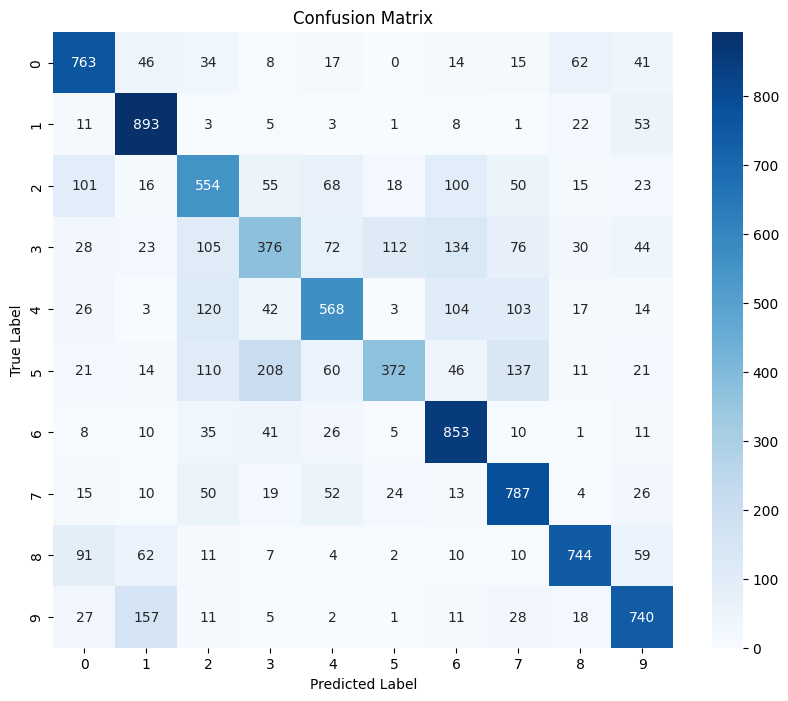

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


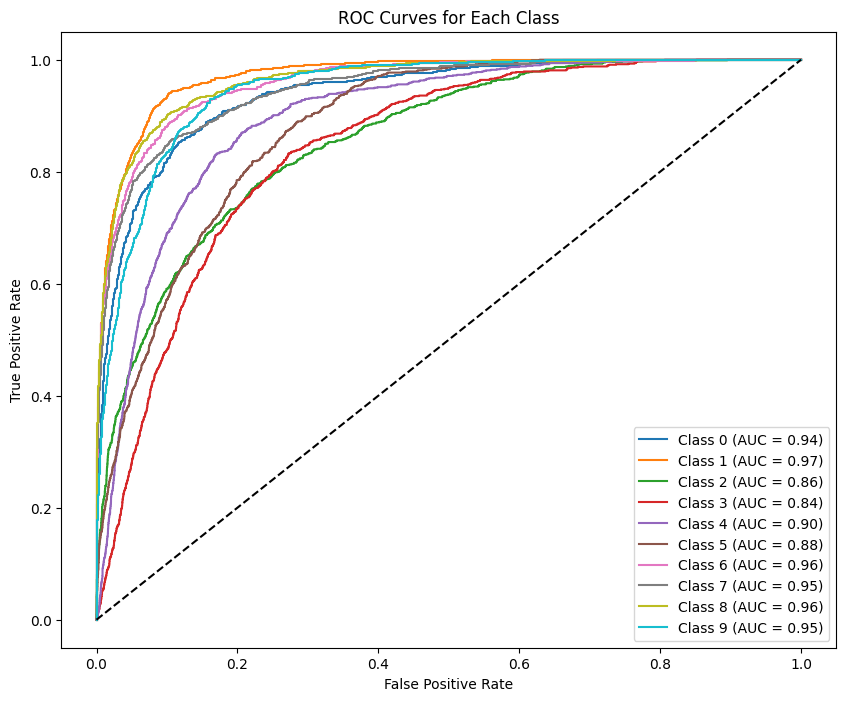

In [ ]:
# Calculate ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs_bin[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_probs_bin[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Define basic data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
def build_baseline_mobilenet_model():
    inputs = layers.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)

    # MobileNetV2 architecture
    base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights=None)
    x = base_model(x)
    x = layers.GlobalAveragePooling2D()(x)  # Global average pooling layer

    # Adding a dense layer for classification
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    outputs = layers.Dense(10)(x)  # Output layer for 10 classes

    # Create and compile model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model
# Build the model
mobilenet_model = build_baseline_mobilenet_model()

# Show the model summary
mobilenet_model.summary()


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_21 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_32 (Functional)     │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,389,130 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [ ]:
# Train the basic MobileNet model
history_baseline = mobilenet_model.fit(train_images, train_labels, epochs=5, batch_size=64,
                                        validation_split=0.1, verbose=1)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 313s 395ms/step - accuracy: 0.1466 - loss: 2.2645 - val_accuracy: 0.0970 - val_loss: 2.3184
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 371s 465ms/step - accuracy: 0.2449 - loss: 1.9500 - val_accuracy: 0.0970 - val_loss: 2.3512
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 329s 390ms/step - accuracy: 0.2699 - loss: 1.8749 - val_accuracy: 0.0970 - val_loss: 2.3373
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 323s 391ms/step - accuracy: 0.2856 - loss: 1.8232 - val_accuracy: 0.0970 - val_loss: 2.4120
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 322s 392ms/step - accuracy: 0.3180 - loss: 1.7805 - val_accuracy: 0.0970 - val_loss: 2.3610


In [ ]:
# Evaluate the basic model on the test set
test_loss, test_accuracy = mobilenet_model.evaluate(test_images, test_labels)
print(f"MobileNet Model Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.0988 - loss: 2.3591
MobileNet Model Test Accuracy: 10.00%


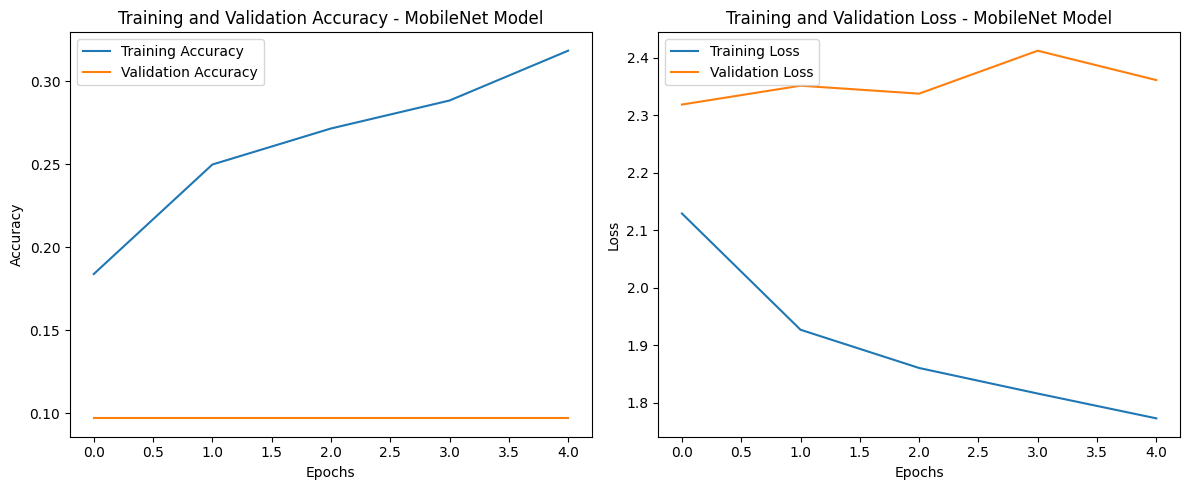

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - MobileNet Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - MobileNet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


In [ ]:
# Get predictions
y_pred_proba = tf.nn.softmax(mobilenet_model.predict(test_images)).numpy()  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_proba, axis=1)  # Get predicted class labels

# Print classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("Classification Report:\n", classification_report(test_labels.flatten(), y_pred_classes, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.10      1.00      0.18      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


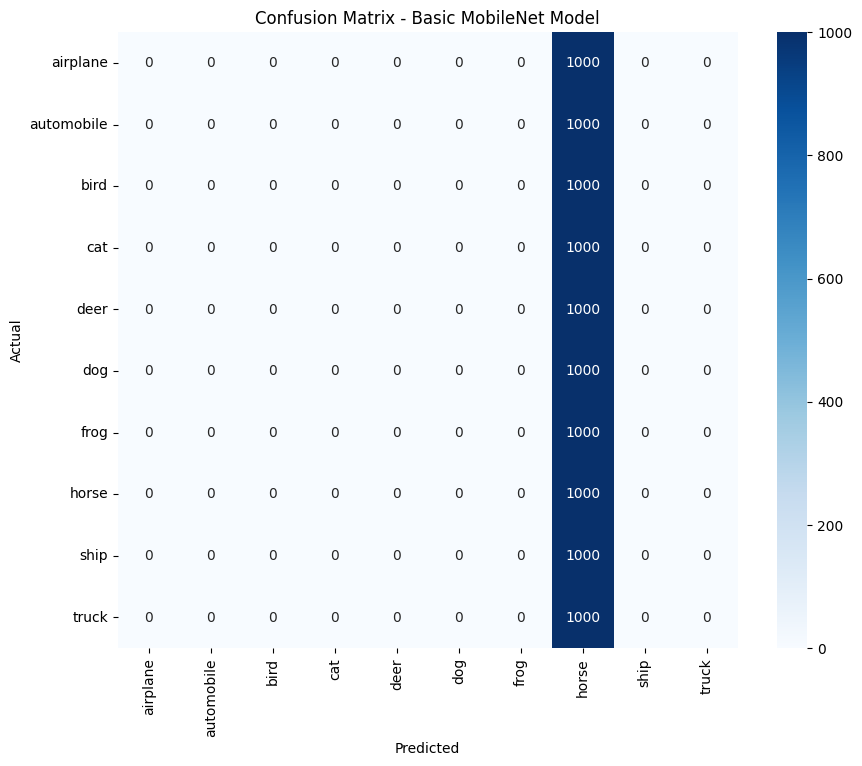

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(test_labels.flatten(), y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Basic MobileNet Model')
plt.show()


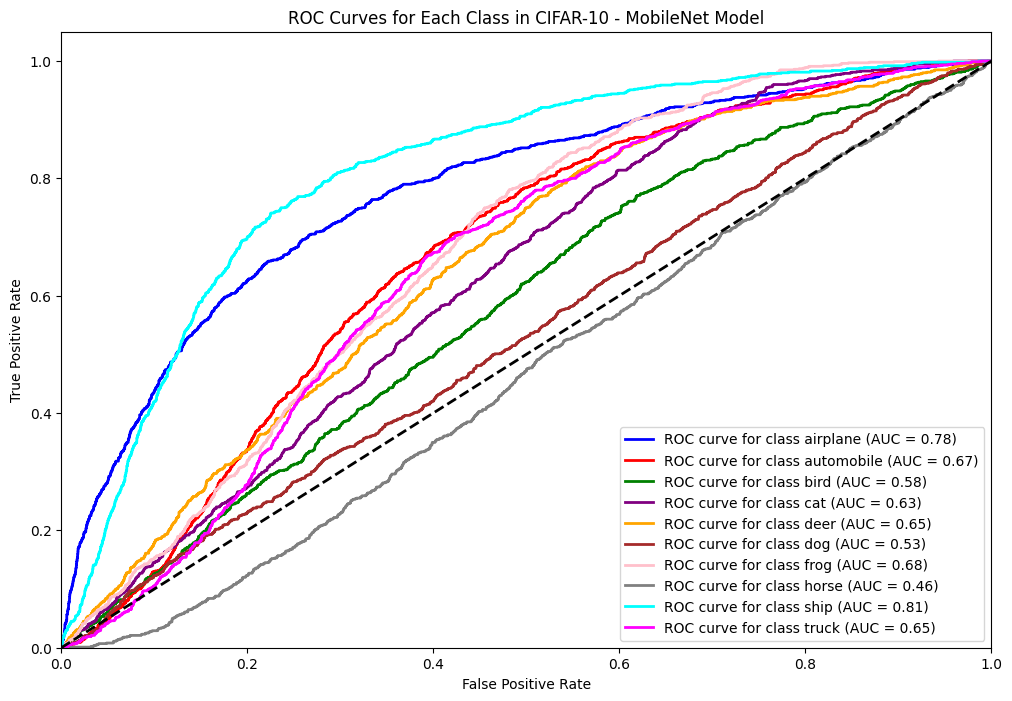

In [ ]:
# Binarize the test labels for multi-class ROC calculation
test_labels_binarized = label_binarize(test_labels.flatten(), classes=range(10))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for class {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class in CIFAR-10 - MobileNet Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models, optimizers
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Resize images from 32x32 to 64x64
train_images_resized = np.array([tf.image.resize(image, (64, 64)).numpy() for image in train_images])
test_images_resized = np.array([tf.image.resize(image, (64, 64)).numpy() for image in test_images])

# Normalize images to [0, 1]
train_images_resized, test_images_resized = train_images_resized / 255.0, test_images_resized / 255.0


In [ ]:
def build_mobilenet_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.5):
    base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    # Custom top layers for CIFAR-10
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10)  # Output layer for CIFAR-10 classes
    ])

    # Set optimizer with specified learning rate
    if optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = optimizers.SGD(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model


In [ ]:
# Reduced hyperparameter grid
opt_choices = ['adam']               # Only Adam optimizer for simplicity
learning_rates = [0.001]             # Single learning rate to reduce configurations
dropout_rates = [0.5]                # Single dropout rate

# Use a single validation split (e.g., 10% of training data)
validation_split = 0.1
epochs = 2  # Lower epochs for faster tuning


In [ ]:
results = {}

for optimizer in opt_choices:
    for lr in learning_rates:
        for dropout_rate in dropout_rates:
            print(f"\nConfig: optimizer={optimizer}, lr={lr}, dropout_rate={dropout_rate}")

            # Build and train model with current configuration
            model = build_mobilenet_model(optimizer=optimizer, learning_rate=lr, dropout_rate=dropout_rate)

            history = model.fit(train_images_resized, train_labels,
                                epochs=epochs, batch_size=64,
                                validation_split=validation_split, verbose=1)

            # Get final validation accuracy
            val_acc = history.history['val_accuracy'][-1]
            train_acc = history.history['accuracy'][-1]
            config_name = f"opt={optimizer}_lr={lr}_dropout={dropout_rate}"
            results[config_name] = {'train_acc': train_acc, 'val_acc': val_acc}

            print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")



Config: optimizer=adam, lr=0.001, dropout_rate=0.5


<ipython-input-5-c33d98d8cb6e>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 181s 250ms/step - accuracy: 0.3591 - loss: 1.9581 - val_accuracy: 0.6302 - val_loss: 1.1566
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 197s 244ms/step - accuracy: 0.5437 - loss: 1.3276 - val_accuracy: 0.6398 - val_loss: 1.0792
Train Acc: 0.5469, Val Acc: 0.6398


In [ ]:
# Display results and select best configuration
print("\nHyperparameter Tuning Results:")
for config, metrics in results.items():
    print(f"{config}: Train Acc={metrics['train_acc']:.4f}, Val Acc={metrics['val_acc']:.4f}")

# Find best configuration based on validation accuracy
best_config = max(results, key=lambda config: results[config]['val_acc'])
best_params = best_config.split('_')
best_optimizer = best_params[0].split('=')[1]
best_lr = float(best_params[1].split('=')[1])
best_dropout = float(best_params[2].split('=')[1])

print(f"\nBest Configuration: {best_config}")
print(f"Optimizer: {best_optimizer}, Learning Rate: {best_lr}, Dropout Rate: {best_dropout}")



Hyperparameter Tuning Results:
opt=adam_lr=0.001_dropout=0.5: Train Acc=0.5469, Val Acc=0.6398

Best Configuration: opt=adam_lr=0.001_dropout=0.5
Optimizer: adam, Learning Rate: 0.001, Dropout Rate: 0.5


In [ ]:
# Rebuild the model with the best hyperparameters
final_model = build_mobilenet_model(optimizer=best_optimizer, learning_rate=best_lr, dropout_rate=best_dropout)

# Train on the full training set with reduced epochs
history = final_model.fit(train_images_resized, train_labels,
                          epochs=5, batch_size=64,
                          validation_split=validation_split,
                          verbose=1)


<ipython-input-5-c33d98d8cb6e>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 178s 248ms/step - accuracy: 0.3657 - loss: 1.9340 - val_accuracy: 0.6312 - val_loss: 1.1533
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 196s 240ms/step - accuracy: 0.5445 - loss: 1.3316 - val_accuracy: 0.6424 - val_loss: 1.0739
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 207s 248ms/step - accuracy: 0.5689 - loss: 1.2460 - val_accuracy: 0.6568 - val_loss: 1.0520
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 194s 236ms/step - accuracy: 0.5771 - loss: 1.2177 - val_accuracy: 0.6624 - val_loss: 1.0187
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 196s 278ms/step - accuracy: 0.5858 - loss: 1.1984 - val_accuracy: 0.6646 - val_loss: 1.0100


In [ ]:
# Evaluate on the resized test set
test_loss, test_accuracy = final_model.evaluate(test_images_resized, test_labels, verbose=0)
print(f"Final MobileNet Model Test Accuracy: {test_accuracy * 100:.2f}%")


Final MobileNet Model Test Accuracy: 65.91%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get model predictions
y_pred_probs = final_model.predict(test_images_resized)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels
y_true = test_labels.flatten()  # True labels for the test set

# Binarize labels for multi-class ROC and AUC (one-hot encode)
y_true_bin = label_binarize(y_true, classes=range(10))


313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step


In [ ]:
# Classification report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.63      0.64      1000
  automobile       0.79      0.79      0.79      1000
        bird       0.66      0.46      0.54      1000
         cat       0.55      0.49      0.52      1000
        deer       0.52      0.61      0.56      1000
         dog       0.70      0.58      0.64      1000
        frog       0.58      0.80      0.67      1000
       horse       0.74      0.70      0.72      1000
        ship       0.70      0.75      0.72      1000
       truck       0.74      0.77      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



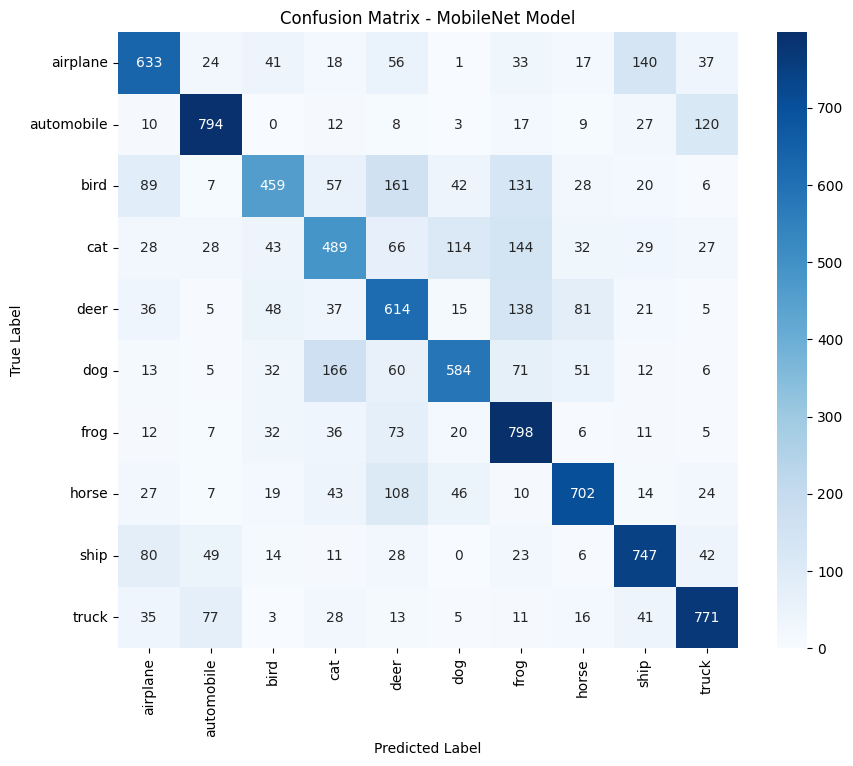

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNet Model")
plt.show()


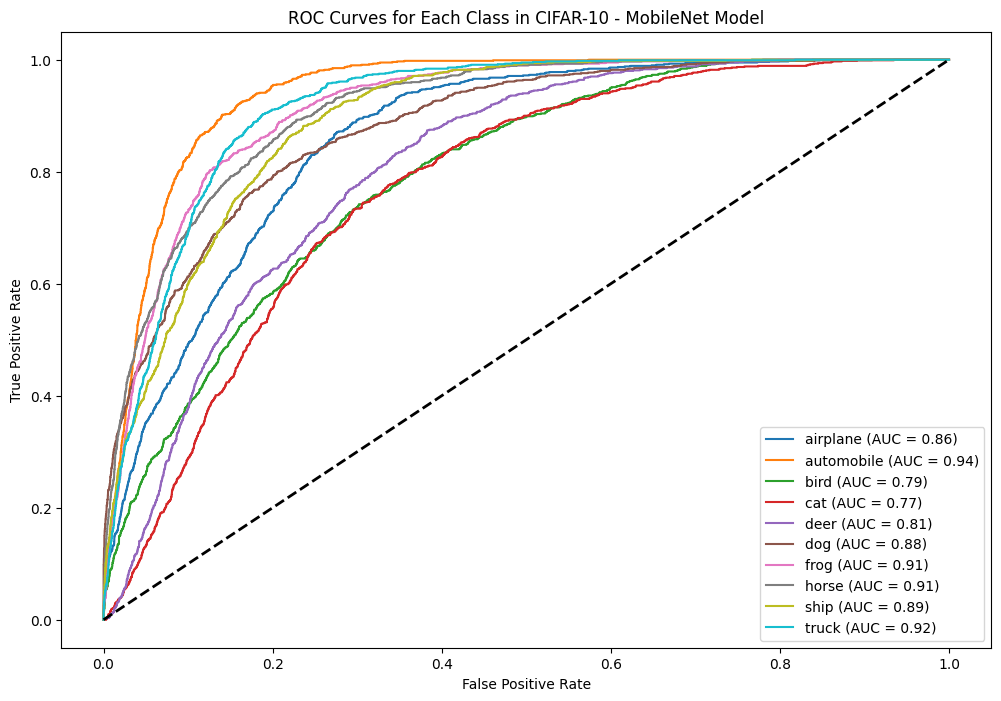

In [ ]:
# Calculate ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_probs[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class in CIFAR-10 - MobileNet Model")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
# Splitting Data into Training and Validation Sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [ ]:
# model architecture
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def resnet_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, conv_size, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    # Use a layer to add input_data to x
    x = layers.Add()([x, input_data])
    x = layers.ReLU()(x)
    return x

def resnet18():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Define the first stage
    x = layers.Conv2D(64, (3, 3), padding='same', strides=2, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = resnet_block(x, 64, (3, 3))

    # Repeating similar blocks for other stages
    for filters in [128, 256, 512]:
        x = layers.Conv2D(filters, (3, 3), padding='same', strides=2, use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = resnet_block(x, filters, (3, 3))

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10)(x)

    model = models.Model(inputs=inputs, outputs=x, name='resnet18')
    return model

model = resnet18()
model.summary()


Model: "resnet18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,728 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 32, 32, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 16, 16, 64)     │         36,864 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 16, 16, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 16, 16, 64)     │         36,864 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16, 16, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 16, 16, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 64)     │         36,864 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 16, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 16, 16, 64)     │              0 │ batch_normalization_3… │
│                           │                        │                │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 16, 16, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 128)      │         73,728 │ re_lu_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 8, 8, 128)      │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 7,870,666 (30.02 MB)

 Trainable params: 7,864,778 (30.00 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [ ]:
#  train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=64)



Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4236 - loss: 2.8192 - val_accuracy: 0.2936 - val_loss: 2.5239
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6592 - loss: 1.2314 - val_accuracy: 0.6334 - val_loss: 1.2594
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7328 - loss: 0.9729 - val_accuracy: 0.6636 - val_loss: 1.1774
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7889 - loss: 0.8180 - val_accuracy: 0.6090 - val_loss: 1.4900
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8189 - loss: 0.7442 - val_accuracy: 0.4644 - val_loss: 2.2241
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8517 - loss: 0.6558 - val_accuracy: 0.6410 - val_loss: 1.3593
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8734 - loss: 0.5965 - val_accuracy: 0.6572 - val_loss: 1.3964
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8954 - loss: 0.5229 - 

In [ ]:
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7151 - loss: 1.2352
Test Accuracy: 71.52%


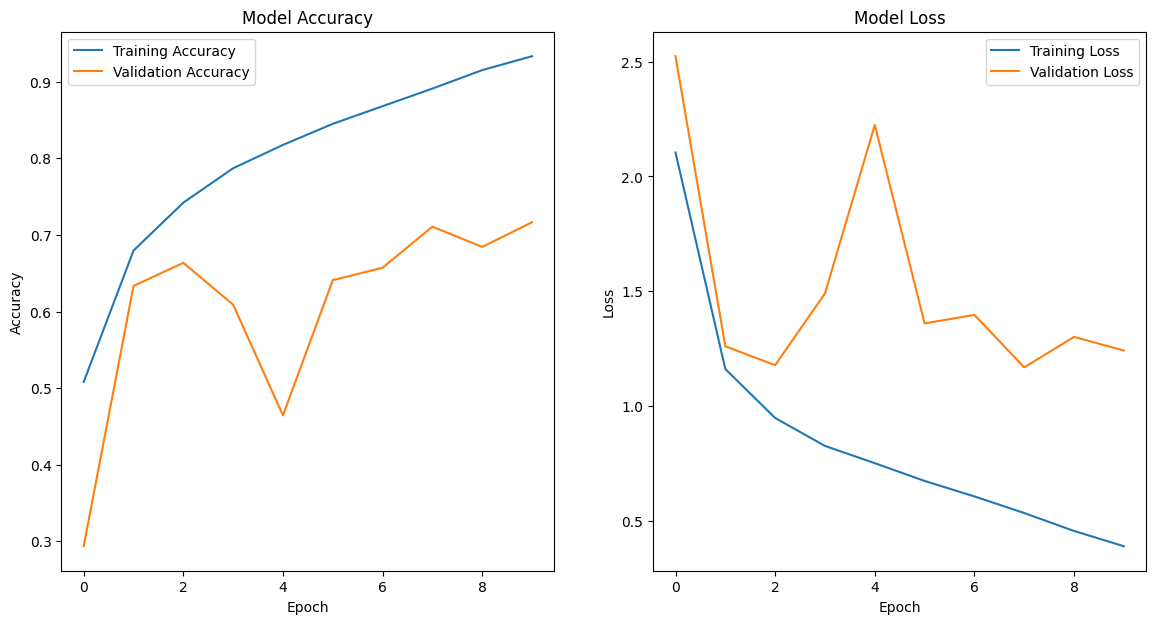

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = y_test.flatten()  # Flatten y_test to match y_pred_classes format

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Generate and print the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.81      0.73      0.77      1000
  automobile       0.85      0.88      0.86      1000
        bird       0.71      0.55      0.62      1000
         cat       0.74      0.41      0.52      1000
        deer       0.49      0.86      0.62      1000
         dog       0.65      0.64      0.65      1000
        frog       0.85      0.70      0.77      1000
       horse       0.63      0.87      0.73      1000
        ship       0.96      0.62      0.75      1000
       truck       0.78      0.90      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.71     10000
weighted avg       0.75      0.72      0.71     10000



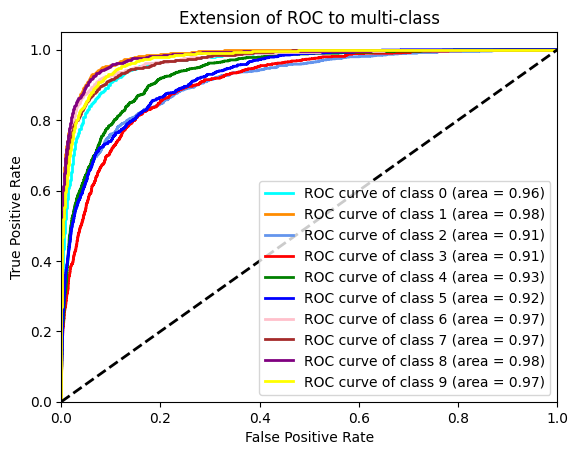

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC analysis
y_test_binarized = label_binarize(y_true, classes=np.arange(10))  # Adjust according to your class labels

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'pink', 'brown', 'purple', 'yellow'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of ROC to multi-class')
plt.legend(loc="lower right")
plt.show()


<Figure size 1000x800 with 0 Axes>

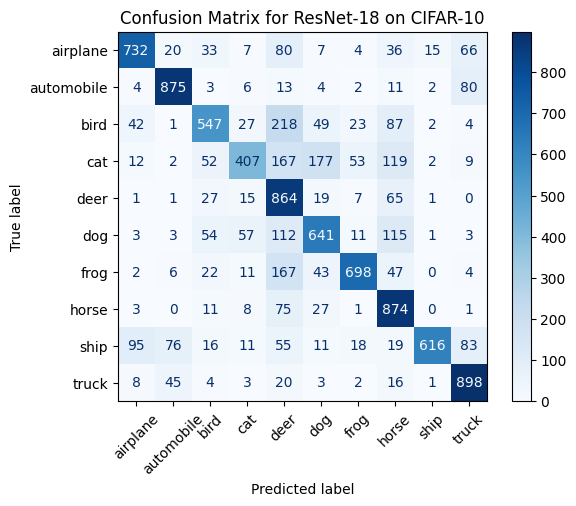

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix for ResNet-18 on CIFAR-10")
plt.show()


<Figure size 1200x600 with 0 Axes>

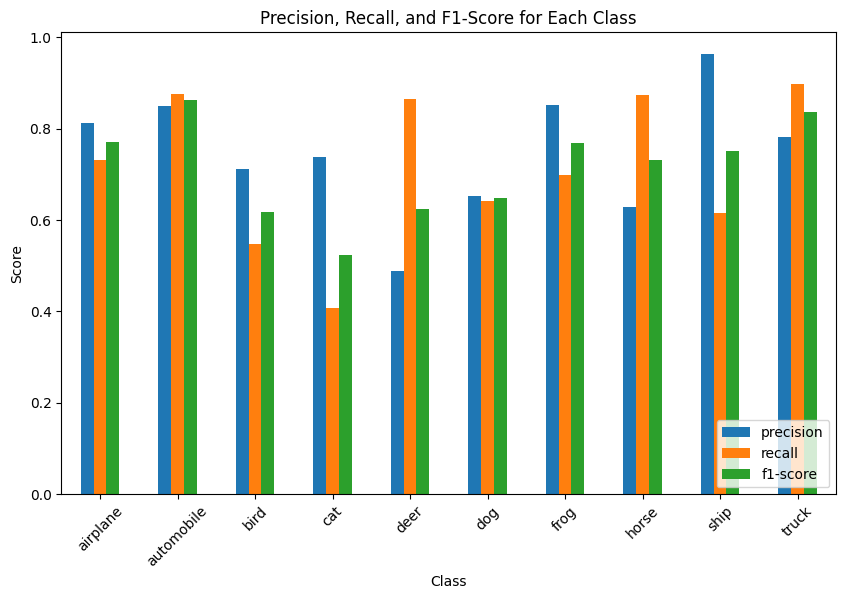

In [ ]:
import pandas as pd
import seaborn as sns

# Convert classification report to a DataFrame for easier plotting
report_dict = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot precision, recall, and F1-score for each class
plt.figure(figsize=(12, 6))
report_df.iloc[:-3, :-1].plot(kind="bar", figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Define hyperparameter grid
hyperparams = {
    'optimizers': [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD],
    'learning_rates': [1e-3, 1e-4],
    'dropouts': [0.3, 0.5],
    'residual': [True, False],
    'augmentations': [None, 'standard', 'extensive']
}


In [ ]:
# Define data augmentation functions
def get_datagen(aug_type):
    if aug_type == 'standard':
        return ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    elif aug_type == 'extensive':
        return ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
    else:
        return ImageDataGenerator()


In [ ]:
# Function to build the model
def build_model(dropout_rate, residual):
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    for filters in [64, 128, 256, 512]:
        x = layers.Conv2D(filters, (3, 3), padding='same', strides=2, use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        if residual:
            shortcut = x
            x = layers.Conv2D(filters, (3, 3), padding='same', use_bias=False)(x)
            x = layers.BatchNormalization()(x)
            x = layers.Dropout(dropout_rate)(x)
            x = layers.Add()([x, shortcut])
            x = layers.ReLU()(x)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10)(x)
    model = models.Model(inputs, outputs)
    return model



In [ ]:
from sklearn.model_selection import KFold
# K-Fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
results = []



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import KFold

# K-Fold cross-validation with fewer splits
kf = KFold(n_splits=2, shuffle=True, random_state=42)
results = []

# Memory-optimized hyperparameter tuning loop
for optimizer_class in [tf.keras.optimizers.Adam]:  # Limit to one optimizer for this run
    for lr in [1e-3]:  # Limit to one learning rate for this run
        for dropout_rate in [0.3]:  # Limit to one dropout rate for this run
            for residual in [True, False]:  # Test only with/without residual links
                for aug_type in ['standard']:  # Use only one augmentation type

                    fold_results = []
                    for train_index, val_index in kf.split(x_train):
                        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
                        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                        # Data Augmentation
                        datagen = get_datagen(aug_type)
                        datagen.fit(x_train_fold)

                        # Build and compile a smaller model
                        model = build_model(dropout_rate, residual)
                        optimizer = optimizer_class(learning_rate=lr)
                        model.compile(optimizer=optimizer,
                                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                      metrics=['accuracy'])

                        # Adjusted Callbacks with reduced patience
                        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)
                        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

                        # Train for fewer epochs
                        history = model.fit(
                            datagen.flow(x_train_fold, y_train_fold, batch_size=32),  # Smaller batch size
                            epochs=5,  # Reduced epochs
                            validation_data=(x_val_fold, y_val_fold),
                            callbacks=[lr_scheduler, early_stopping]
                        )

                        # Store results
                        fold_results.append({
                            'train_accuracy': history.history['accuracy'],
                            'val_accuracy': history.history['val_accuracy'],
                            'train_loss': history.history['loss'],
                            'val_loss': history.history['val_loss']
                        })

                        # Clear model from memory
                        del model
                        tf.keras.backend.clear_session()

                    # Average fold results for each hyperparameter setting
                    avg_train_acc = np.mean([r['train_accuracy'][-1] for r in fold_results])
                    avg_val_acc = np.mean([r['val_accuracy'][-1] for r in fold_results])
                    avg_train_loss = np.mean([r['train_loss'][-1] for r in fold_results])
                    avg_val_loss = np.mean([r['val_loss'][-1] for r in fold_results])

                    results.append({
                        'optimizer': optimizer_class,
                        'learning_rate': lr,
                        'dropout': dropout_rate,
                        'residual': residual,
                        'augmentation': aug_type,
                        'avg_train_accuracy': avg_train_acc,
                        'avg_val_accuracy': avg_val_acc,
                        'avg_train_loss': avg_train_loss,
                        'avg_val_loss': avg_val_loss
                    })




Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.3165 - loss: 1.9137 - val_accuracy: 0.2071 - val_loss: 2.8134 - learning_rate: 0.0010
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4908 - loss: 1.3976 - val_accuracy: 0.4760 - val_loss: 1.8321 - learning_rate: 0.0010
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5740 - loss: 1.1995 - val_accuracy: 0.5672 - val_loss: 1.3707 - learning_rate: 0.0010
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6208 - loss: 1.0738
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6208 - loss: 1.0738 - val_accuracy: 0.5561 - val_loss: 1.4268 - learning_rate: 0.0010
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.6802 - loss: 0.9079 - val_accuracy: 0.7180 - val_loss: 0.8041 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 5.
Epoch 1/5
704/704 ━━━━━━━━━━━━

In [ ]:
# Display results
for result in results:
    print("Optimizer:", result['optimizer'].__name__)
    print("Learning Rate:", result['learning_rate'])
    print("Dropout Rate:", result['dropout'])
    print("Residual Links:", result['residual'])
    print("Data Augmentation:", result['augmentation'])
    print("Average Train Accuracy:", result['avg_train_accuracy'])
    print("Average Validation Accuracy:", result['avg_val_accuracy'])
    print("Average Train Loss:", result['avg_train_loss'])
    print("Average Validation Loss:", result['avg_val_loss'])
    print("-" * 50)

Optimizer: Adam
Learning Rate: 0.001
Dropout Rate: 0.3
Residual Links: True
Data Augmentation: standard
Average Train Accuracy: 0.6730444431304932
Average Validation Accuracy: 0.6964666545391083
Average Train Loss: 0.9290769100189209
Average Validation Loss: 0.8872991502285004
--------------------------------------------------
Optimizer: Adam
Learning Rate: 0.001
Dropout Rate: 0.3
Residual Links: False
Data Augmentation: standard
Average Train Accuracy: 0.6763333380222321
Average Validation Accuracy: 0.6968888938426971
Average Train Loss: 0.9181711375713348
Average Validation Loss: 0.8758204281330109
--------------------------------------------------


In [ ]:
# Find the best configuration based on validation accuracy
best_config = max(results, key=lambda x: x['avg_val_accuracy'])

# Display the best configuration
print("Best Hyperparameters:")
print("Optimizer:", best_config['optimizer'].__name__)
print("Learning Rate:", best_config['learning_rate'])
print("Dropout Rate:", best_config['dropout'])
print("Residual Links:", best_config['residual'])
print("Data Augmentation:", best_config['augmentation'])
print("Average Validation Accuracy:", best_config['avg_val_accuracy'])


Best Hyperparameters:
Optimizer: Adam
Learning Rate: 0.001
Dropout Rate: 0.3
Residual Links: False
Data Augmentation: standard
Average Validation Accuracy: 0.6968888938426971


In [ ]:
# Data augmentation with the best configuration
datagen = get_datagen(best_config['augmentation'])
datagen.fit(x_train)

# Build the final model with the best hyperparameters
final_model = build_model(best_config['dropout'], best_config['residual'])
optimizer = best_config['optimizer'](learning_rate=best_config['learning_rate'])
final_model.compile(optimizer=optimizer,
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

# Callbacks for final training
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, verbose=1)
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model on the entire training set
final_history = final_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=15,  # Adjust epochs as needed based on convergence observed in tuning
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.4104 - loss: 1.6380 - learning_rate: 0.0010
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.5969 - loss: 1.1305 - learning_rate: 0.0010
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.6692 - loss: 0.9326 - learning_rate: 0.0010
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.7064 - loss: 0.8463 - learning_rate: 0.0010
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7309 - loss: 0.7730 - learning_rate: 0.0010
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.7521 - loss: 0.7131 - learning_rate: 0.0010
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.7660 - loss: 0.6644 - learning_rate: 0.0010
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.7808 - loss: 0.6264 - learning_rate: 0.0010
Epoch 9/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.7903 - loss: 0.596

In [ ]:
# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test)
print(f"Test Accuracy with best hyperparameters: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8112 - loss: 0.5573
Test Accuracy with best hyperparameters: 81.02%


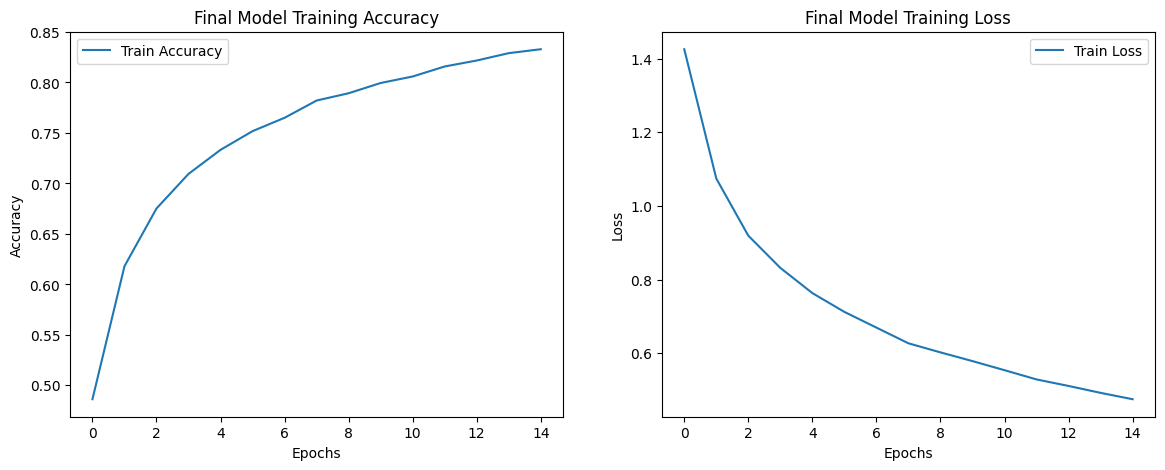

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Final Model Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final Model Training Loss')
plt.legend()

plt.show()


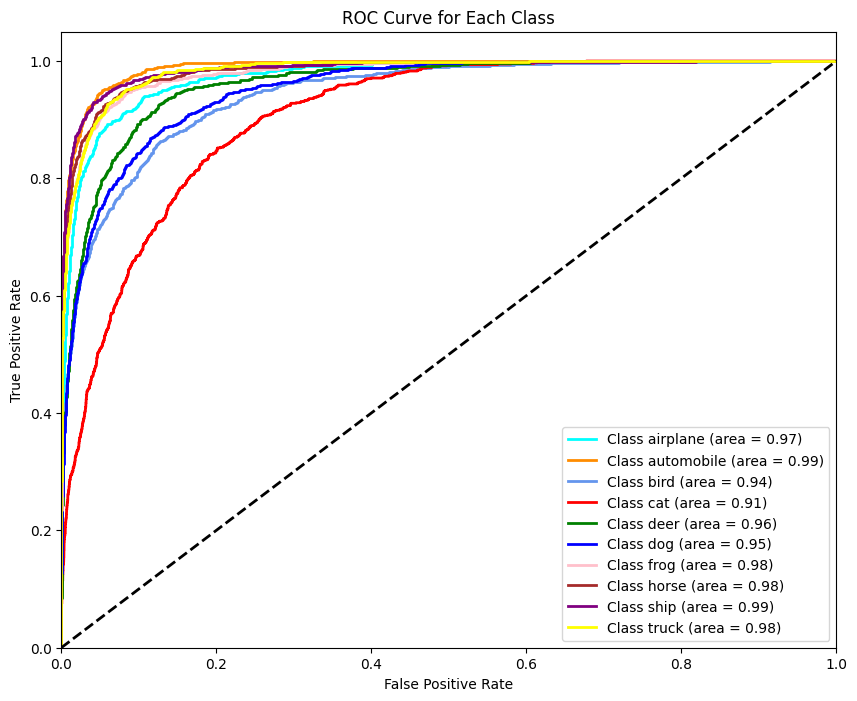

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(10))

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'pink', 'brown', 'purple', 'yellow'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


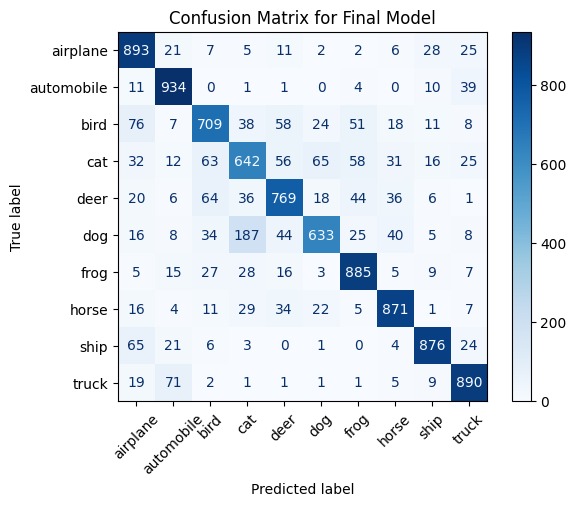

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test.flatten(), y_pred_classes)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix for Final Model")
plt.show()


In [ ]:
final_model.save("best_model_cifar10.h5")
print("Model saved as 'best_model_cifar10.h5'")


Model saved as 'best_model_cifar10.h5'
